In [1]:
import pypsa

In [2]:
model = pypsa.Network('C:/Users/hie/pe_tan/pypsa-earth/results/veroni/networks/elec_s_all_ec_lcopt_1h.nc')





INFO:pypsa.io:Imported network elec_s_all_ec_lcopt_1h.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


In [3]:
#model.export_to_csv_folder('output')

In [4]:
lines = model.lines
buses = model.buses
generators = model.generators
generators_t = model.generators_t
load=model.loads
buses=model.buses





Cost

In [5]:
# Fuel costs for Natural Gas and Coal plants in $/kWh from the table in PSMP 2020 update
natural_gas_fuel_costs = [
    0.0460, 0.0312, 0.0339, 0.0347, 0.0339, 0.0339, 0.0339, 0.0339, 
    0.0347, 0.0339, 0.0347, 0.0312, 0.0339, 0.0339, 0.0339, 0.0339
]

coal_fuel_costs = [
    0.0212, 0.0212, 0.0212, 0.0231, 0.0231, 0.0189, 0.0189, 0.0212,
    0.0212, 0.0212, 0.0212, 0.0212, 0.0212, 0.0212, 0.0212
]

# Calculate the averages in $/kWh
avg_natural_gas_fuel_cost = sum(natural_gas_fuel_costs) / len(natural_gas_fuel_costs)
avg_coal_fuel_cost = sum(coal_fuel_costs) / len(coal_fuel_costs)

# Convert $/kWh to EUR/MWh (1 USD = 0.92 EUR, and 1 MWh = 1000 kWh)
usd_to_eur = 0.92
conversion_factor = 1000 * usd_to_eur

avg_natural_gas_fuel_cost_eur_mwh = avg_natural_gas_fuel_cost * conversion_factor
avg_coal_fuel_cost_eur_mwh = avg_coal_fuel_cost * conversion_factor

avg_natural_gas_fuel_cost_eur_mwh, avg_coal_fuel_cost_eur_mwh


(31.71125, 19.45493333333333)

In [6]:

# Display the names of the available line types
line_types = model.line_types
line_type_names = line_types.index.tolist()

print("Available line types:")
for name in line_type_names:
    print(name)

Available line types:
149-AL1/24-ST1A 10.0
149-AL1/24-ST1A 110.0
149-AL1/24-ST1A 20.0
15-AL1/3-ST1A 0.4
184-AL1/30-ST1A 110.0
184-AL1/30-ST1A 20.0
24-AL1/4-ST1A 0.4
243-AL1/39-ST1A 110.0
243-AL1/39-ST1A 20.0
305-AL1/39-ST1A 110.0
48-AL1/8-ST1A 0.4
48-AL1/8-ST1A 10.0
48-AL1/8-ST1A 20.0
490-AL1/64-ST1A 220.0
490-AL1/64-ST1A 380.0
94-AL1/15-ST1A 0.4
94-AL1/15-ST1A 10.0
94-AL1/15-ST1A 20.0
N2XS(FL)2Y 1x120 RM/35 64/110 kV
N2XS(FL)2Y 1x185 RM/35 64/110 kV
N2XS(FL)2Y 1x240 RM/35 64/110 kV
N2XS(FL)2Y 1x300 RM/35 64/110 kV
NA2XS2Y 1x185 RM/25 12/20 kV
NA2XS2Y 1x240 RM/25 12/20 kV
NA2XS2Y 1x95 RM/25 12/20 kV
NAYY 4x120 SE
NAYY 4x150 SE
NAYY 4x50 SE
Al/St 240/40 2-bundle 220.0
Al/St 240/40 3-bundle 300.0
Al/St 240/40 4-bundle 380.0
Al/St 560/50 4-bundle 750.0
HVDC XLPE 1000
HVDC Oil filled 1400


GADM data- only at Tanzania level (1)

c:\Users\hie\AppData\Local\anaconda3\envs\pypsa-earth\lib\site-packages\pyogrio\geopandas.py:265: UserWarning:

More than one layer found in 'gadm41_TZA.gpkg': 'ADM_ADM_0' (default), 'ADM_ADM_1', 'ADM_ADM_2', 'ADM_ADM_3'. Specify layer parameter to avoid this warning.



<AxesSubplot:>

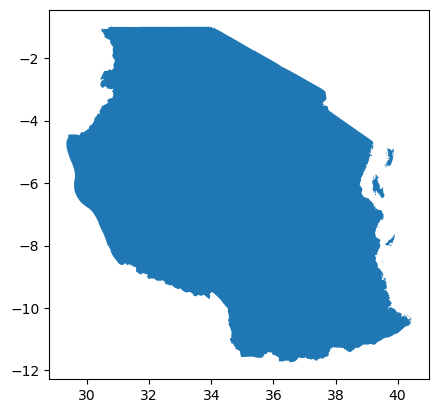

In [7]:
import geopandas as gpd

# Replace 'path_to_your_file.gpkg' with the actual path to your GPKG file
gpkg_file_path = r'C:/Users/hie/pe_tan/pypsa-earth/data/gadm/gadm41_TZA/gadm41_TZA.gpkg'

# Read the GPKG file
gdf = gpd.read_file(gpkg_file_path)

# Print the contents of the GeoDataFrame
gdf.plot()

In [8]:
model.statistics()

Optimal Capacity  Installed Capacity  \
Generator   Biomass                 1.050000e+01        1.050000e+01   
            Coal                    6.000000e+02        6.000000e+02   
            Combined-Cycle Gas      1.192700e+03        1.192700e+03   
            Geothermal              1.350000e+02        1.350000e+02   
            Oil                     8.880000e+01        8.880000e+01   
            Onshore Wind            9.119919e-01        9.119919e-01   
            Open-Cycle Gas          1.850000e+02        1.850000e+02   
            Run of River            6.017862e+02        6.017862e+02   
            Solar                   1.431497e+01        1.431497e+01   
            load                    1.620000e+11        1.620000e+11   
Line        AC                      3.674891e+04        3.567872e+04   
Link        battery charger         2.246446e+01        0.000000e+00   
            battery discharger      2.340047e+01        0.000000e+00   
Load        -                       0.000000e+00        0.000000e+00   
StorageUnit Reservoir & Dam         4.340626e+03        4.340626e+03   
Store       Battery Storage         8.979872e+03        0.000000e+00   

                                      Supply    Withdrawal      Dispatch  \
Generator   Biomass             9.197775e+04  0.000000e+00  9.197775e+04   
            Coal                5.173212e+06  0.000000e+00  5.173212e+06   
            Combined-Cycle Gas  1.426759e+06  0.000000e+00  1.426759e+06   
            Geothermal          1.182596e+06  0.000000e+00  1.182596e+06   
            Oil                 1.955983e+02  0.000000e+00  1.955983e+02   
            Onshore Wind        9.598508e+02  0.000000e+00  9.598508e+02   
            Open-Cycle Gas      5.021356e+00  0.000000e+00  5.021356e+00   
            Run of River        2.277746e+05  0.000000e+00  2.277746e+05   
            Solar               2.088976e+04  0.000000e+00  2.088976e+04   
            load                1.257053e+06  0.000000e+00  1.257053e+06   
Line        AC                  4.576463e+07  4.576463e+07  0.000000e+00   
Link        battery charger     1.036607e+04  1.079799e+04 -4.319197e+02   
            battery discharger  9.952013e+03  1.036668e+04 -4.146672e+02   
Load        -                   0.000000e+00  1.044053e+07 -1.044053e+07   
StorageUnit Reservoir & Dam     1.059950e+06  0.000000e+00  1.059950e+06   
Store       Battery Storage     9.506887e+03  9.506887e+03 -6.081077e-13   

                                Transmission  Capacity Factor  Curtailment  \
Generator   Biomass             0.000000e+00     9.999755e-01     0.000000   
            Coal                0.000000e+00     9.842489e-01     0.000000   
            Combined-Cycle Gas  0.000000e+00     1.365574e-01     0.000000   
            Geothermal          0.000000e+00     9.999968e-01     0.000000   
            Oil                 0.000000e+00     2.514479e-04     0.000000   
            Onshore Wind        0.000000e+00     1.201458e-01     1.452194   
            Open-Cycle Gas      0.000000e+00     3.098455e-06     0.000000   
            Run of River        0.000000e+00     4.320747e-02  1946.923454   
            Solar               0.000000e+00     1.665861e-01     6.099959   
            load                0.000000e+00     8.857978e-07     0.000000   
Line        AC                 -1.284140e+07     1.421613e-01     0.000000   
Link        battery charger     0.000000e+00     5.487102e-02     0.000000   
            battery discharger  0.000000e+00     5.057209e-02     0.000000   
Load        -                   0.000000e+00              NaN     0.000000   
StorageUnit Reservoir & Dam     0.000000e+00     2.787589e-02     0.000000   
Store       Battery Storage     0.000000e+00     5.028946e-01     0.000000   

                                Capital Expenditure  Operational Expenditure  \
Generator   Biomass                    3.714831e+06             1.456767e+06   
            Coal           

In [9]:
model.generators

,carrier,bus,p_nom_min,p_nom,efficiency,marginal_cost,capital_cost,build_year,lifetime,p_nom_max,...,q_set,marginal_cost_quadratic,committable,start_up_cost,shut_down_cost,stand_by_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
C31,biomass,53,9.0,9.000000e+00,0.468,15.838125,353793.420755,2010,30.0,inf,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
C32,biomass,48,1.5,1.500000e+00,0.468,15.838998,353793.420755,2011,30.0,inf,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
C33,CCGT,1,102.0,1.020000e+02,0.580,46.812501,126181.845894,2007,20.0,inf,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
C34,CCGT,25,189.0,1.890000e+02,0.580,46.812533,126181.845894,2006,20.0,inf,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
C35,CCGT,1,129.0,1.290000e+02,0.580,46.813154,126181.845894,2011,25.0,inf,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96 battery load,load,96 battery,0.0,1.000000e+09,1.000,100.010873,0.000000,0,inf,inf,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
97 battery load,load,97 battery,0.0,1.000000e+09,1.000,100.010962,0.000000,0,inf,inf,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
98 battery load,load,98 battery,0.0,1.000000e+09,1.000,100.009421,0.000000,0,inf,inf,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0


In [10]:
grouped_generators=model.generators.groupby(by=model.generators.carrier).sum()
grouped_generators

,bus,p_nom_min,p_nom,efficiency,marginal_cost,capital_cost,build_year,lifetime,p_nom_max,weight,...,q_set,marginal_cost_quadratic,committable,start_up_cost,shut_down_cost,stand_by_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
carrier,,,,,,,,,,,,,,,,,,,,,
CCGT,125141413844444644,1192.700000,1.192700e+03,5.800,468.129206,1.261818e+06,20126,190.0,inf,10.000000,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,10.0,10.0
OCGT,41,185.000000,1.850000e+02,0.410,64.694654,5.893728e+04,2027,20.0,inf,1.000000,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
biomass,5348,10.500000,1.050000e+01,0.936,31.677123,7.075868e+05,4021,60.0,inf,2.000000,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
coal,48,600.000000,6.000000e+02,0.330,32.224216,4.414993e+05,2026,20.0,inf,1.000000,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
geothermal,77327,135.000000,1.350000e+02,4.000,0.038889,0.000000e+00,8112,100.0,inf,4.000000,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
load,1367911141518192021222425272930313233343536373...,0.000000,1.620000e+11,162.000,16201.614224,0.000000e+00,0,inf,inf,162.000000,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,162.0,162.0
offwind-ac,1202534363843444546607390,0.000000,0.000000e+00,13.000,0.324848,3.395806e+06,0,inf,7.021520e+04,14854.267326,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,13.0,13.0
offwind-dc,1202534363843444546607390,0.000000,0.000000e+00,13.000,0.323976,3.799043e+06,0,inf,6.073973e+05,168489.789150,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,13.0,13.0
oil,75143949494489493,88.800000,8.880000e+01,3.150,1417.805314,4.403489e+05,18067,180.0,inf,9.000000,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,9.0,9.0


In [11]:
total_p_nom = model.generators['p_nom'].sum()
total_p_nom

162000002829.0132

<AxesSubplot:xlabel='snapshot', ylabel='MW'>

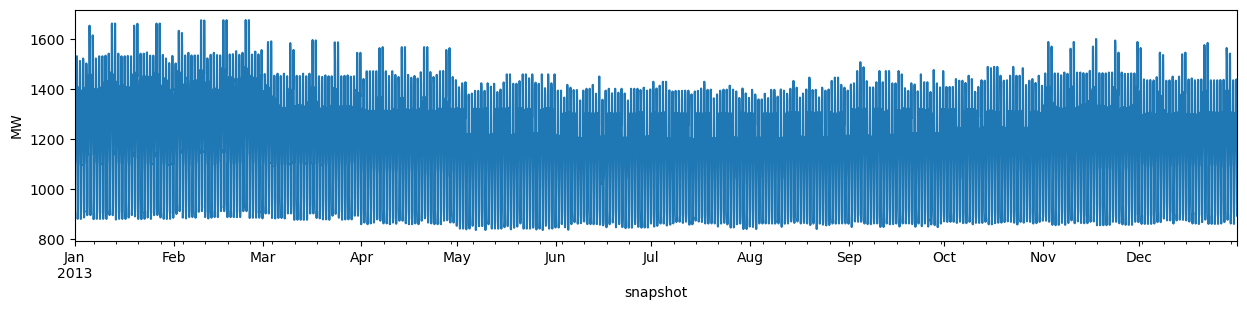

In [12]:
model.loads_t.p_set.sum(axis=1).plot(figsize=(15,3), ylabel="MW")

In [13]:
model.loads_t.p.sum()

Load
0       84120.889712
2      193680.510261
4       25488.017696
7      227592.636954
8       45111.172378
           ...      
96       7027.897445
97       2792.680559
98     118866.519745
99      66132.145517
100    290181.188090
Length: 81, dtype: float64

In [14]:
model.iplot(mapbox='osm')

{'data': [Scattermapbox({
      'lat': [-6.7116, -6.6413],
      'line': {'color': 'rosybrown', 'width': 3},
      'lon': [38.7439, 38.3689],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-5.2955, -4.0717],
      'line': {'color': 'rosybrown', 'width': 3},
      'lon': [38.6191, 37.7377],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-4.8396, -3.6219],
      'line': {'color': 'rosybrown', 'width': 3},
      'lon': [34.7573, 33.5148],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-8.8482, -8.9146],
      'line': {'color': 'rosybrown', 'width': 3},
      'lon': [34.8061, 33.4967],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-3.6219, -3.2208],
      'line': {'color': 'rosybrown', 'width': 3},
      'lon': [33.5148, 32.4905],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-3.861, -3.6219],
      'line': {'color'

c:\Users\hie\AppData\Local\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".



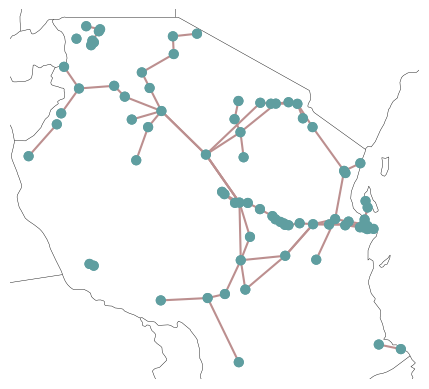

In [15]:
model.plot();


In [16]:
for c in model.iterate_components(list(model.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name,len(c.df)))

Component 'Bus' has 162 entries
Component 'Carrier' has 17 entries
Component 'Line' has 86 entries
Component 'LineType' has 34 entries
Component 'TransformerType' has 14 entries
Component 'Link' has 162 entries
Component 'Load' has 81 entries
Component 'Generator' has 392 entries
Component 'StorageUnit' has 16 entries
Component 'Store' has 81 entries


In [17]:
model.lines

,v_nom,bus0,bus1,length,dc,geometry,bounds,carrier,type,s_max_pu,...,s_nom_max,lifetime,terrain_factor,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu
Line,,,,,,,,,,,,,,,,,,,,,
0,380.0,20,29,43.985476,False,"MULTILINESTRING ((38.7439 -6.7116, 38.74378869...",MULTIPOINT ((38.357321400000096 -6.63929209999...,AC,Al/St 240/40 4-bundle 380.0,0.7,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
1,380.0,47,30,181.143759,False,MULTILINESTRING ((38.61745752374756 -5.2964469...,MULTIPOINT ((37.73768980000001 -4.071734399999...,AC,Al/St 240/40 4-bundle 380.0,0.7,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
2,380.0,27,11,221.213747,False,"LINESTRING (34.7563 -4.8406, 34.75503799999999...","MULTIPOINT ((34.7563 -4.8406), (33.5148 -3.6219))",AC,Al/St 240/40 4-bundle 380.0,0.7,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
3,380.0,48,7,161.020453,False,MULTILINESTRING ((33.49678590000009 -8.9145849...,"MULTIPOINT ((33.4967 -8.9146), (33.49678590000...",AC,Al/St 240/40 4-bundle 380.0,0.7,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
4,380.0,11,35,129.558873,False,MULTILINESTRING ((32.49089980000009 -3.2207166...,"MULTIPOINT ((32.4905 -3.2208), (32.49089980000...",AC,Al/St 240/40 4-bundle 380.0,0.7,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,380.0,38,60,36.903154,False,"MULTILINESTRING ((39.1924 -6.6559, 39.19949769...","MULTIPOINT ((39.1924 -6.6559), (39.19949769999...",AC,Al/St 240/40 4-bundle 380.0,0.7,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
82,380.0,83,98,142.161401,False,"MULTILINESTRING ((29.803 -4.8849, 29.803014100...","MULTIPOINT ((29.803 -4.8849), (29.803014100000...",AC,Al/St 240/40 4-bundle 380.0,0.7,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
83,380.0,75,99,96.604528,False,MULTILINESTRING ((30.7134309000001 -3.68768539...,"MULTIPOINT ((30.7134 -3.6877), (30.71343090000...",AC,Al/St 240/40 4-bundle 380.0,0.7,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0


In [18]:
model.storage_units

,carrier,bus,p_nom,max_hours,p_min_pu,efficiency_dispatch,efficiency_store,cyclic_state_of_charge,marginal_cost,build_year,...,sign,marginal_cost_quadratic,capital_cost,lifetime,state_of_charge_initial,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge_per_period,standing_loss,inflow
StorageUnit,,,,,,,,,,,,,,,,,,,,,
0 hydro,hydro,33,200.000000,116.194857,0.0,0.9,0.0,True,0.009920,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
2 hydro,hydro,15,80.000000,116.194857,0.0,0.9,0.0,True,0.010793,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
4 hydro,hydro,57,7.125972,116.194857,0.0,0.9,0.0,True,0.009380,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
6 hydro,hydro,82,2115.000000,116.194857,0.0,0.9,0.0,True,0.009412,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
7 hydro,hydro,93,27.000000,116.194857,0.0,0.9,0.0,True,0.010034,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
8 hydro,hydro,94,300.000000,116.194857,0.0,0.9,0.0,True,0.009139,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
9 hydro,hydro,22,358.000000,116.194857,0.0,0.9,0.0,True,0.010517,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
11 hydro,hydro,7,90.100000,116.194857,0.0,0.9,0.0,True,0.010609,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
12 hydro,hydro,7,81.600000,116.194857,0.0,0.9,0.0,True,0.010784,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0


Time varying components

<AxesSubplot:xlabel='snapshot'>

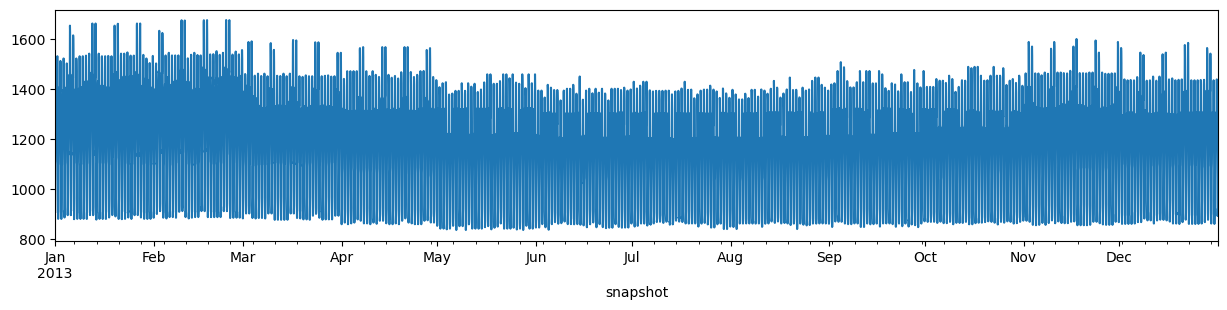

In [19]:
model.loads_t.p_set.sum(axis=1).plot(figsize=(15,3))  

In [20]:
print(model.loads_t.p_set.sum())

Load
0       84120.889712
2      193680.510261
4       25488.017696
7      227592.636954
8       45111.172378
           ...      
96       7027.897445
97       2792.680559
98     118866.519745
99      66132.145517
100    290181.188090
Length: 81, dtype: float64


Total annual system costs

In [21]:
model.objective/1e6 #million euroes per year

126106.61147729392

Transmission line expansion

In [22]:
model.lines.s_nom   #lines nominal capacities

Line
0      147.466806
1      147.466806
2      491.556019
3      491.556019
4      491.556019
         ...     
81     147.466806
82    1787.476433
83    1787.476433
84      53.728216
85     147.466806
Name: s_nom, Length: 86, dtype: float64

In [23]:
model.lines.s_nom_opt #optimized transmission capacity expansion by x 

Line
0      147.469610
1      147.469595
2      491.558406
3      491.558093
4      491.557257
         ...     
81     147.471084
82    1787.514889
83    1787.646490
84      53.731072
85     147.471082
Name: s_nom_opt, Length: 86, dtype: float64

Optimal generator/storage

In [24]:
model.generators.groupby ('carrier').p_nom_opt.sum() #MW

carrier
CCGT          1.192700e+03
OCGT          1.850000e+02
biomass       1.050000e+01
coal          6.000000e+02
geothermal    1.350000e+02
load          1.620000e+11
offwind-ac    0.000000e+00
offwind-dc    0.000000e+00
oil           8.880000e+01
onwind        9.119919e-01
ror           6.017862e+02
solar         1.431497e+01
Name: p_nom_opt, dtype: float64

In [25]:
model.storage_units.groupby ('carrier').p_nom_opt.sum() #MW

carrier
hydro    4340.625972
Name: p_nom_opt, dtype: float64

<AxesSubplot:xlabel='snapshot'>

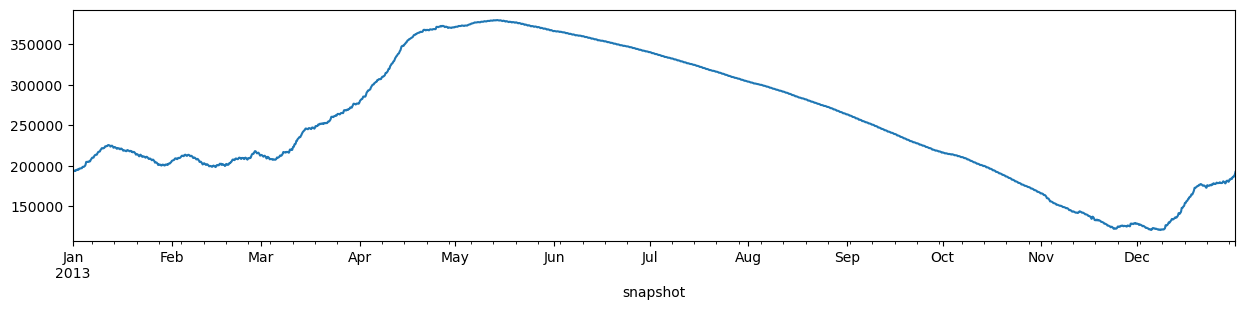

In [26]:
(model.storage_units_t.state_of_charge.filter(like='hydro',axis=1).sum(axis=1)).plot(figsize=(15,3))

Plotting networks with line loading

c:\Users\hie\AppData\Local\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".



(3259750.8377809157, 4533637.657063562, -1236465.6960738087, -86518.2499327938)

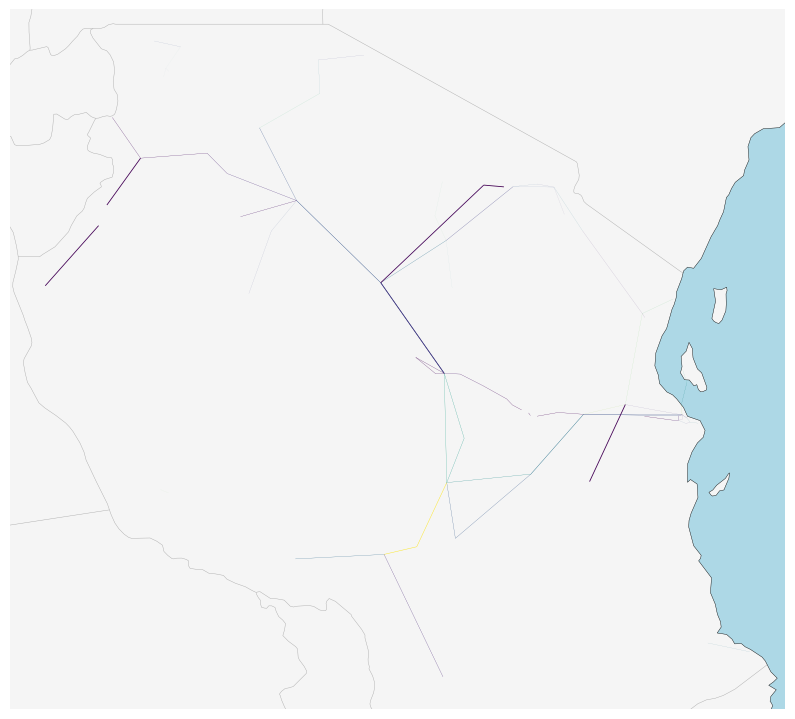

In [27]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

loading= (model.lines_t.p0.abs().mean().sort_index()/(model.lines.s_nom_opt*model.lines.s_max_pu).sort_index()).fillna(0)

fig, ax = plt.subplots(figsize=(10,10), subplot_kw={"projection":ccrs.Mercator()})

model.plot(ax=ax, 
           bus_colors="blue", 
           branch_components=['Line'], 
           line_widths=model.lines.s_nom_opt/3e3,
           line_colors=loading, 
           bus_sizes=0, 
           color_geomap=True)

ax.axis('off')